In [ ]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_timestamp=pd.read_csv("/content/timestamp_data.csv")
df_timestamp

,Unnamed: 0,Connected On
0,0,10-Mar-25
1,1,10-Mar-25
2,2,10-Mar-25
3,3,10-Mar-25
4,4,10-Mar-25
...,...,...
385,385,27-May-24
386,386,27-May-24
387,387,21-Aug-23
388,388,21-Jan-23


Part 2:Analyzing timestamp data for patterns

Meron's Time Stamp data

In [ ]:
df_timestamp=pd.read_csv("/content/Converted_TimestampData.csv")
df_timestamp

,timestamp,query,device,interaction_links
0,2025-01-07 05:36:06.388000+00:00,amber,NaN,[]
1,2025-01-07 05:42:49.985000+00:00,drake sticky,NaN,[]
2,2025-01-07 05:47:13.912000+00:00,drake one dance,NaN,[]
3,2025-01-07 05:50:23.256000+00:00,drake passionfruit,WIN32_X86,[]
4,2025-01-09 05:25:44.746000+00:00,amber,NaN,[]
...,...,...,...,...
641,2025-04-04 21:46:09.570000+00:00,meet me in the,IPHONE,['spotify:episode:25YXwtkQctrkOYnIGOaCFn']
642,2025-04-04 21:46:22.162000+00:00,meet me in the p,IPHONE_ARM64,[]
643,2025-04-04 21:46:22.926000+00:00,meet me in the pale mo,NaN,[]
644,2025-04-04 21:46:22.959000+00:00,meet me in the pale mo,NaN,[]


In [ ]:
# Although it seems the time stamp is already in the date time format, let's convert it just to make sure. Convert 'timestamp' to datetime format, using 'mixed' to handle variation in the timestamp format of meron's timestampt data
df_timestamp['timestamp'] = pd.to_datetime(df_timestamp['timestamp'], format='mixed')

# Sort in chronological order
df_timestamp = df_timestamp.sort_values(by='timestamp')

# Display the first few rows after conversion
df_timestamp.head()

,timestamp,query,device,interaction_links
0,2025-01-07 05:36:06.388000+00:00,amber,NaN,[]
1,2025-01-07 05:42:49.985000+00:00,drake sticky,NaN,[]
2,2025-01-07 05:47:13.912000+00:00,drake one dance,NaN,[]
3,2025-01-07 05:50:23.256000+00:00,drake passionfruit,WIN32_X86,[]
4,2025-01-09 05:25:44.746000+00:00,amber,NaN,[]


In [ ]:
# Calculate the time difference between each row and the one before it
df_timestamp['time_diff'] = df_timestamp['timestamp'].diff()

# Show a few rows to see the new column
df_timestamp[['timestamp', 'time_diff']].head()

,timestamp,time_diff
0,2025-01-07 05:36:06.388000+00:00,NaT
1,2025-01-07 05:42:49.985000+00:00,0 days 00:06:43.597000
2,2025-01-07 05:47:13.912000+00:00,0 days 00:04:23.927000
3,2025-01-07 05:50:23.256000+00:00,0 days 00:03:09.344000
4,2025-01-09 05:25:44.746000+00:00,1 days 23:35:21.490000


In [ ]:
# Find the longest time gap using .max()
longest_gap = df_timestamp['time_diff'].max()

# Find the average time gap using .mean()
average_gap = df_timestamp['time_diff'].mean()

longest_gap, average_gap


(Timedelta('3 days 12:31:51.012000'), Timedelta('0 days 03:15:44.214837209'))

In [ ]:
# Extract date (day only, without time) from the timestamp
df_timestamp['date'] = df_timestamp['timestamp'].dt.date

# Count the number of timestamps per day
daily_counts = df_timestamp['date'].value_counts()

# Find the day with the most timestamps
most_active_day = daily_counts.idxmax()
most_active_day_count = daily_counts.max()

most_active_day, most_active_day_count

(datetime.date(2025, 1, 16), 64)

In [ ]:
# Extract the year and month
df_timestamp['month'] = df_timestamp['timestamp'].dt.to_period('M')

# Count the number of timestamps per month
monthly_counts = df_timestamp['month'].value_counts()

# Find the month with the most timestamps
most_active_month = monthly_counts.idxmax()
most_active_month_count = monthly_counts.max()

most_active_month, most_active_month_count

<ipython-input-54-d5baa33bb741>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_timestamp['month'] = df_timestamp['timestamp'].dt.to_period('M')


(Period('2025-03', 'M'), 219)

The month with the most time stamps is march, 2025 and it had 219 timestamps. The warning message is just because pandas is letting me know that my previous timestamp had timezones which will be droped now that I'm only interested in the month.

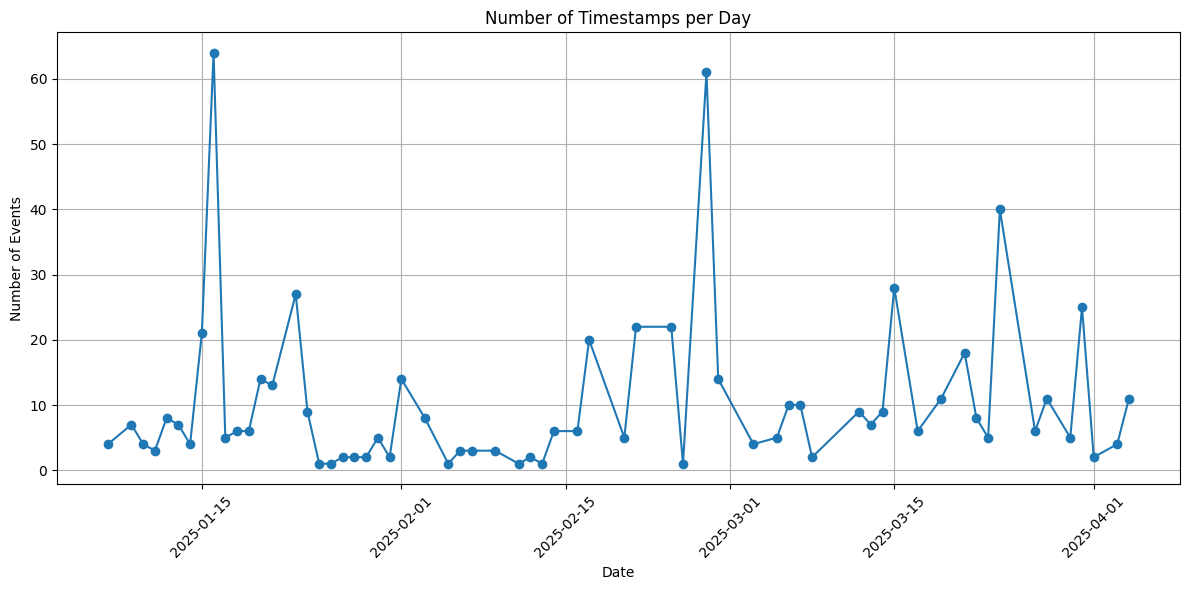

In [ ]:
# Let's plot daily frequency of timestamps using matplotlib
daily_counts_sorted = daily_counts.sort_index()

plt.figure(figsize=(12, 6))
daily_counts_sorted.plot(kind='line', marker='o')
plt.title('Number of Timestamps per Day')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Looking at the line plot:

There are many days with low activity and then sharp spikes on some specific days.

The busiest day was January 16, 2025, with 64 events.

The busiest month was March 2025, with 219 timestamps.

These kinds of patterns suggest high activity, possibly when the Meron was engaging heavily with a certain app or platform.

Followed by gaps, where either no data was logged or the Meron didn’t interact much.


7. What do you think the source of this data is? Write a few sentences explaining your reasoning, as well as what other data might help you verify if you are correct?

Given the structure of the data, search terms related to music, and metadata fields like device and interaction_links, this dataset likely comes from a Google Takeout request, specifically from the Meron's YouTube or Google Search history. The spikes in January 16th and March may represent periods of intensive listening or searching.

### Part 2: Analyzing timestamp data for patterns

*  analyzing Elizabeth's timestamp data

In [ ]:
# load the csv file
df = pd.read_csv('/content/timestamp_data.csv')

In [ ]:
# rename the "connected on" column to timestamp
df.rename(columns={'Connected On': 'timestamp'}, inplace=True)

# step 3: convert the timestamp column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# step 4: sort timestamps in chronological order
df = df.sort_values(by='timestamp')

<ipython-input-57-840ca32f5d60>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp'] = pd.to_datetime(df['timestamp'])


In [ ]:
# create a new column showing time between events
df['time_diff'] = df['timestamp'].diff()

In [ ]:
# calculate the longest and average time gaps
longest_gap = df['time_diff'].max()
average_gap = df['time_diff'].mean()

In [ ]:
# extract day and month info for further analysis
df['day'] = df['timestamp'].dt.date
df['month'] = df['timestamp'].dt.to_period('M')

# find the day with the most events
most_timestamps_day = df['day'].value_counts().idxmax()
most_timestamps_day_count = df['day'].value_counts().max()

# find the month with the most events
most_timestamps_month = df['month'].value_counts().idxmax()
most_timestamps_month_count = df['month'].value_counts().max()

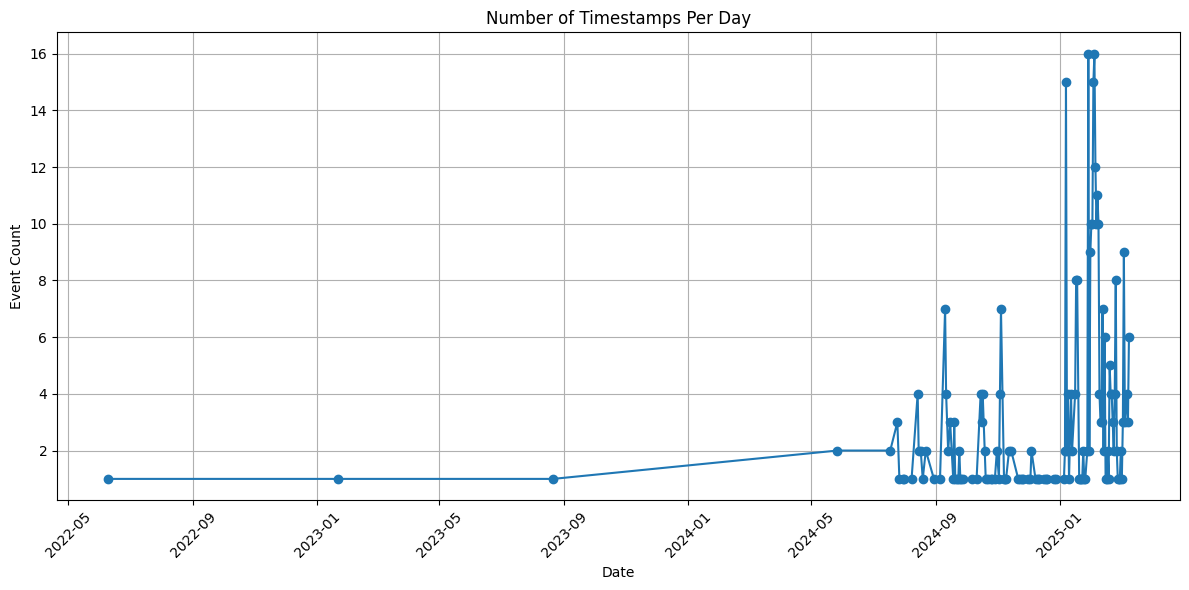

Longest time between timestamps: 280 days 00:00:00
Average time between timestamps: 2 days 14:00:18.508997429
Day with most timestamps: 2025-02-04 with 16 events
Month with most timestamps: 2025-02 with 158 events


In [ ]:
# Create a time series line plot of events per day
daily_counts = df['day'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o')
plt.title('Number of Timestamps Per Day')
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# step 11: print answers
print("Longest time between timestamps:", longest_gap)
print("Average time between timestamps:", average_gap)
print("Day with most timestamps:", most_timestamps_day, "with", most_timestamps_day_count, "events")
print("Month with most timestamps:", most_timestamps_month, "with", most_timestamps_month_count, "events")

### Analysis of Elizabeth's Data

*   The longest time between timestamps is 280 days.
*   The day with the most time stamps is February 04, 2025 and has 16 events on that day.
*   The month with the most timestamps is February in 2025 and that month has 158 events.

I am not exactly sure what the data is, most likely it has 2025 being a more active period so it must be a platform with some form of free trials such as Netflix or Spotify. However, there are barely any timestamps from 2022 to 2024 so that could probably be due to deleting an app such as Tik Tok. So not exactly sure but might be Tik Tok or social media.


Part 3: Make a combined visualization


*   combining Meron and Elizabeth timestamp data into one dataframe before creating visualization

In [ ]:
# Load both timestamp CSVs
df_meron = pd.read_csv('/content/Converted_TimestampData.csv')  # Meron's data
df_elizabeth = pd.read_csv('/content/timestamp_data.csv') # Elizabeth's data

In [ ]:
# Add a column to identify whose data it is
df_meron['person'] = 'Meron'
df_elizabeth['person'] = 'Elizabeth'

#convert Elizabeth's timestamp data to 2025-03-10
df_elizabeth['timestamp'] = pd.to_datetime(df_elizabeth['timestamp'], format='%d-%b-%y', errors='coerce')

# Drop rows with invalid timestamps if any
df_elizabeth = df_elizabeth.dropna(subset=['timestamp'])

# Combine both DataFrames
combined_df = pd.concat([df_meron, df_elizabeth], ignore_index=True)

#  Coerce all timestamps with utc=True to force consistency
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'], errors='coerce', utc=True)

# Convert to tz-naive (remove timezone info)
combined_df['timestamp'] = combined_df['timestamp'].dt.tz_localize(None)

# Drop invalid timestamps
combined_df = combined_df.dropna(subset=['timestamp'])

# Sort by timestamp in chronological order
combined_df = combined_df.sort_values(by='timestamp').reset_index(drop=True)

# Add a new index column
combined_df.index.name = 'Index'

# Only drop Unnamed: 0 if it exists
if 'Unnamed: 0' in combined_df.columns:
    combined_df.drop(columns=['Unnamed: 0'], inplace=True)

# Preview the final combined DataFrame
print(combined_df.head(700))

# Save combined data to new CSV
combined_df.to_csv('/content/combined_timestamp_data.csv')

                    timestamp  query device interaction_links     person
Index                                                                   
0     2022-06-09 00:00:00.000    NaN    NaN               NaN  Elizabeth
1     2023-01-21 00:00:00.000    NaN    NaN               NaN  Elizabeth
2     2023-08-21 00:00:00.000    NaN    NaN               NaN  Elizabeth
3     2024-05-27 00:00:00.000    NaN    NaN               NaN  Elizabeth
4     2024-05-27 00:00:00.000    NaN    NaN               NaN  Elizabeth
...                       ...    ...    ...               ...        ...
695   2025-02-27 05:51:37.948     me    NaN                []      Meron
696   2025-02-27 05:51:37.982    mer    NaN                []      Meron
697   2025-02-27 05:51:38.003   mere    NaN                []      Meron
698   2025-02-27 05:51:38.473  mereb    NaN                []      Meron
699   2025-02-27 05:51:38.533  mereb    NaN                []      Meron

[700 rows x 5 columns]




*  creating visualization with combined dataframe




visualization 1


*   monthly activity of each person's timestamps
*   comparison of peak time stamps



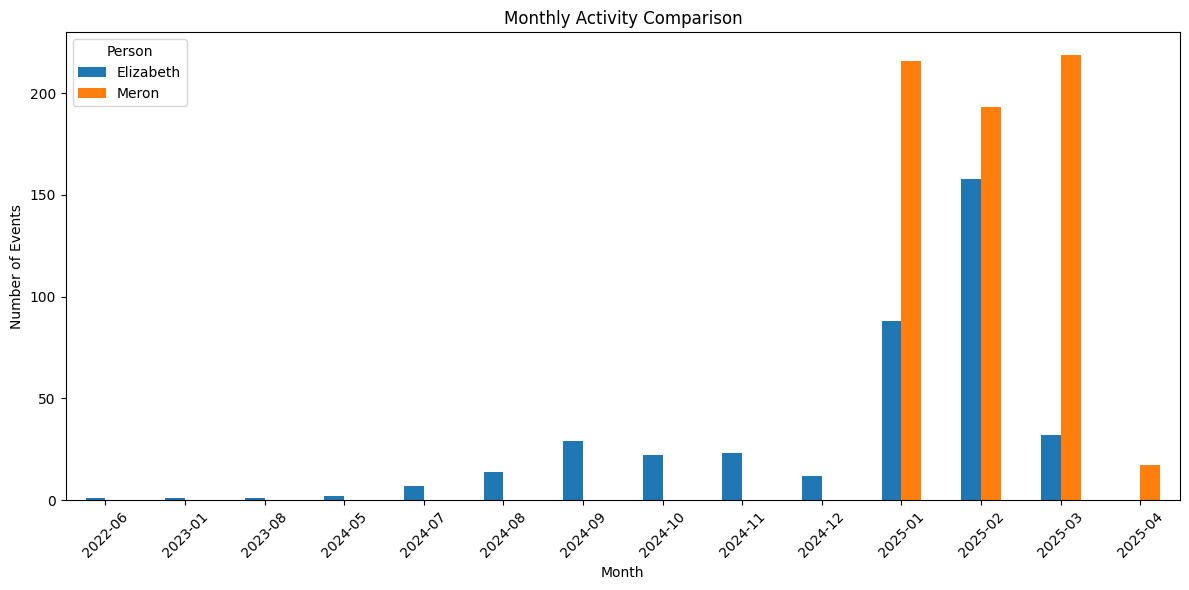

In [ ]:
v# group by month and person

# create a month column from timestamp
combined_df['month'] = combined_df['timestamp'].dt.to_period('M')

# group by month and person to count number of events
monthly_counts = combined_df.groupby(['month', 'person']).size().unstack().fillna(0)

# plot monthly activity comparison
monthly_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Activity Comparison')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.legend(title='Person')
plt.tight_layout()
plt.show()

**analysis**

*   based on timestamp monthly activity comparison, monthly activity use varies a lot indicating different platforms use by the two users
*   there is a longer time span of data for Elizabeth but for Meron only the year 2025, which may indicate usage of platforms whether it is a new tool for academics or social engagement
*   there is more consistent upward tren from 2022 to 2024 for Elizabeth however for Meron there is a sharp downwardtrend from March of 2025 to April, 2025








visualization 2

Daily activities of each person's timestamps visualized using a scatter plot

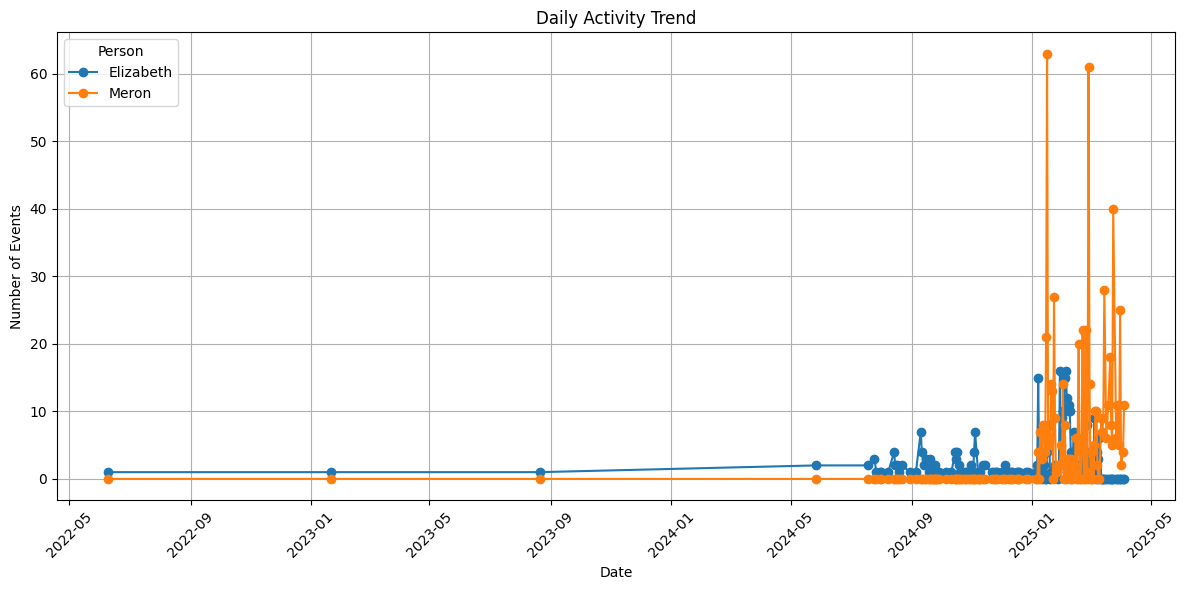

In [ ]:
# Plot daily activity trend using a line graph. This helps visualize how activity changes over time for each person
# Extract date only
combined_df['date'] = combined_df['timestamp'].dt.date

# Group by both date and person
daily_counts = combined_df.groupby(['date', 'person']).size().unstack().fillna(0)

# Plot the line grapgh
daily_counts.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Daily Activity Trend')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.legend(title='Person')
plt.grid(True)
plt.tight_layout()
plt.show()

**analysis**

*   for both Meron and Elizabeth there is consistent daily use from 2022 to 2024 of their platforms
*   however in 2025 there is sharp upward trend of daily use for Meron while there is a more gradual upward trend for Elizabeth
*   the sharp upward daily trend for Meron could indicate more consistent engagement such as during midterms for use of Spotify or travel on flights while for Elizabeth the more gradual upward trend could mean more serious engagement in networking with the platform of Linkedin possibily from use of Premium or better utilization  







Part 4:Analyze and visualize an additional element from  your personal data

Elizabeth's Data

<ipython-input-122-e971fe943f51>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette='Blues_d')


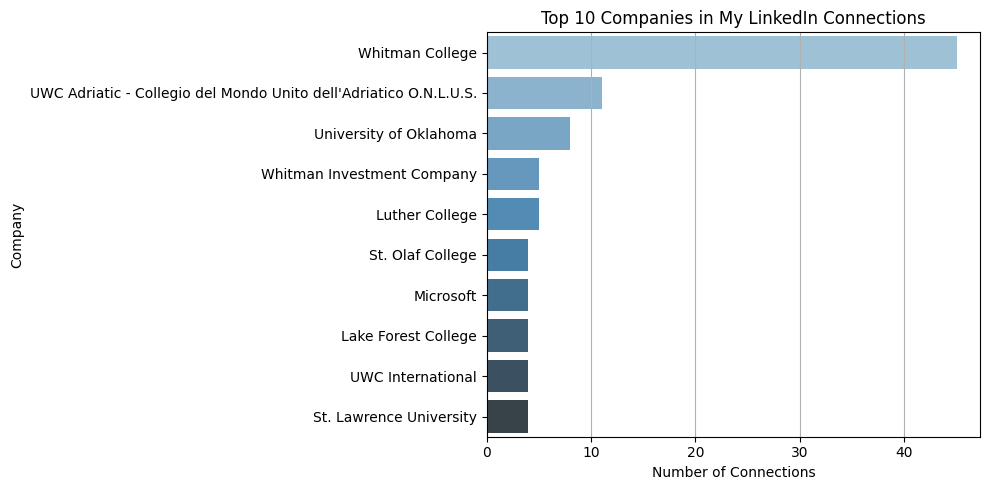

In [ ]:
# Rename columns for clarity
df_connections.columns = ['First Name', 'Last Name', 'URL', 'Email Address', 'Company', 'Position', 'Connected On']

# Drop any empty rows (if First Name is missing, it's likely a blank row)
df_connections= df_connections.dropna(subset=['First Name'])

# QUESTION 1: Which companies are most common?

# Count frequency of companies and keep top 10
top_companies = df_connections['Company'].value_counts().head(10)

# Bar plot for top companies
plt.figure(figsize=(10, 5))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='Blues_d')
plt.title('Top 10 Companies in My LinkedIn Connections')
plt.xlabel('Number of Connections')
plt.ylabel('Company')
plt.tight_layout()
plt.grid(axis='x')
plt.show()


Question 1: Which companies are most common?

Answer: Among all the companies in my collections, Whitman College is the one that I have most of my connections from. This does make sense as most of my connections are either school mates that I personality know or faculty members from Whitman. The least is St.Laurence.

<ipython-input-121-3b81b4d08b5d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_positions.values, y=top_positions.index, palette='Greens_d')


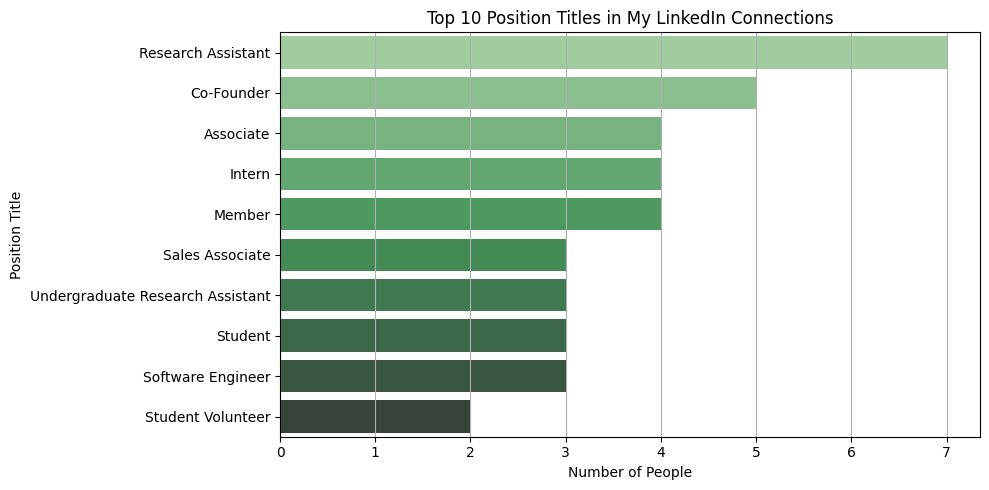

In [ ]:
# QUESTION 2: What are the most common positions?

# Count frequency of positions and keep top 10
top_positions = df_connections['Position'].value_counts().head(10)

# Bar plot for top positions
plt.figure(figsize=(10, 5))
sns.barplot(x=top_positions.values, y=top_positions.index, palette='Greens_d')
plt.title('Top 10 Position Titles in My LinkedIn Connections')
plt.xlabel('Number of People')
plt.ylabel('Position Title')
plt.tight_layout()
plt.grid(axis='x')
plt.show()

Question 2: What are the most common positions?

Answer: From the findings above, the most common position titles in my Likedin Connections is Reaserch assistant. This is interesting as I have never intentionally connected with research assistants or any other particular field/positions. If I were to re-connect I would probably have more connections from economic related interns/jobs positions which I assume might be captured under interns. Student Volunteer seems to be the least common position in my connection.

<ipython-input-120-5a87a6371b16>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=company_position_counts.values, y=company_position_counts.index, palette='mako')


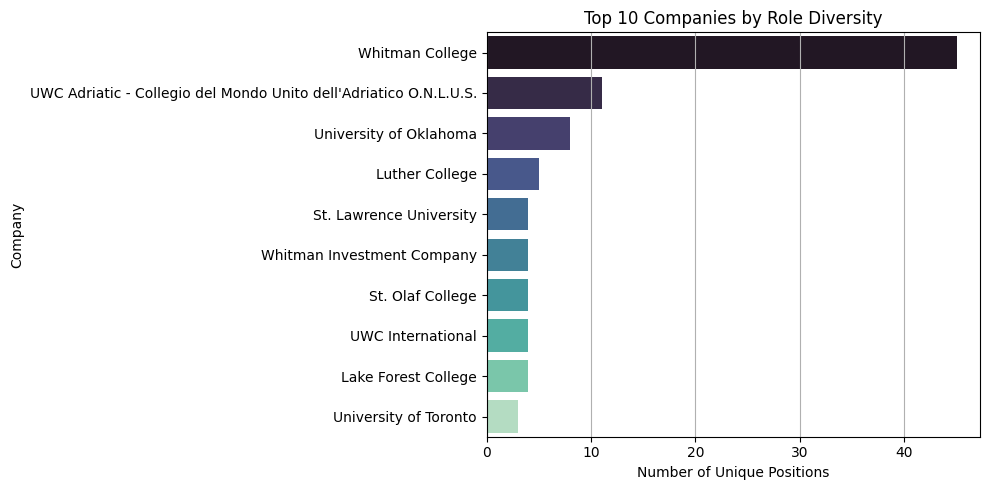

In [ ]:
# Data Manipulation: Count number of unique position titles per company
# Group by company and count unique positions held
company_position_counts = df_connections.groupby('Company')['Position'].nunique().sort_values(ascending=False).head(10)

# Companies with the most diverse roles among my connections
plt.figure(figsize=(10, 5))
sns.barplot(x=company_position_counts.values, y=company_position_counts.index, palette='mako')
plt.title('Top 10 Companies by Role Diversity')
plt.xlabel('Number of Unique Positions')
plt.ylabel('Company')
plt.tight_layout()
plt.grid(axis='x')
plt.show()

Meron's data

### visualization: most frequently listened to artists
**Who are my most listened-to artists?**

By grouping songs by artist and counting how many tracks I’ve saved per artist, I was able to identify the top 10 artists in my library. Tyler, The Creator and Aminé topped the list, each with over 30 tracks. This suggests that I tend to follow select artists closely and engage with a significant portion of their discography.

**Do I gravitate more toward emerging artists or established names?**

 Looking at the visualization, there is a notable blend of mainstream artists like Drake, The Weeknd, and Frank Ocean, alongside niche and emerging artistss such as Malcolm Todd and Akalé Wubé. This balance indicates that my listening habits reflect both algorithmic recommendations of popular artists and intentional discovery of lesser-known artists.

<ipython-input-49-ed038e72e9d4>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




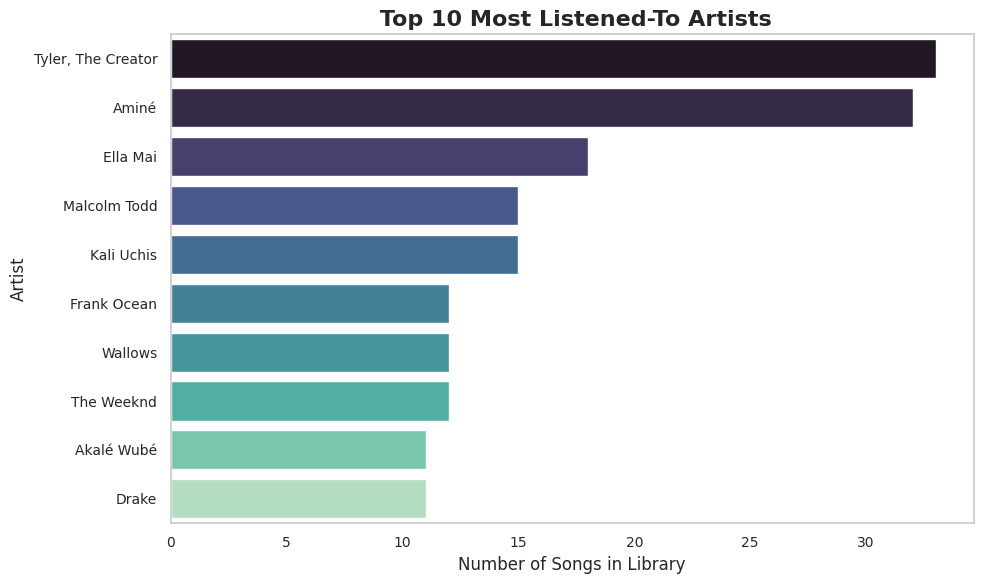

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# set seaborn style
sns.set(style='whitegrid')

# step 1: group and count top artists
top_artists = df['artist'].value_counts().head(10)

# step 2: plot as horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_artists.values,
    y=top_artists.index,
    palette='mako'
)

# step 3: style and labels
plt.title(' Top 10 Most Listened-To Artists', fontsize=16, weight='bold')
plt.xlabel('Number of Songs in Library', fontsize=12)
plt.ylabel('Artist', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x')
plt.tight_layout()

# Step 4: Show it
plt.show()

### visualization: diversity within music library

**Does my music library reflect global diversity or is it mostly English-dominated?**

Answer: Based on language detection, the majority of songs in my library originate from artists who sing in English most likely based in the United States. However, a significant portion of songs also come from regions such as Brazil, France, Spain, and Egypt indicating that while my listening is centered in Western media there is a measurable global influence. This suggests a primary alignment with mainstream English music buut some international variety and exploration.

**Which regions or countries are most represented in my music library based on inferred language?**

The choropleth map shows the United States as the most dominant region in my library. Secondary clusters include Brazil (Portuguese), France and Spain (French and Spanish), and Egypt (Arabic). This suggests that beyond English, I gravitate toward songs in Romance languages such as French and Spanish, as well as regions of the Global South, specifically North Africa/Middle East (Arabic). These trends likely reflect the combined influence of algorithmic recommendations, peer influence, and cultural background.

Acknowledgement:
Used Claude AI to figure out what library I need to import, langdetect, and used that to extract language to country data.

In [ ]:
import pandas as pd
import plotly.express as px
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

# Load your library CSV
df = pd.read_csv('/content/YourLibrary_converted.csv')

# Detect language
def detect_language(text):
    try:
        return detect(str(text))
    except:
        return "unknown"

df['language'] = df['artist'].apply(detect_language)

# Map language to country
lang_region_map = {
    'en': 'United States',
    'es': 'Spain',
    'ko': 'South Korea',
    'fr': 'France',
    'de': 'Germany',
    'ja': 'Japan',
    'it': 'Italy',
    'pt': 'Brazil',
    'ru': 'Russia',
    'ar': 'Egypt',
    'hi': 'India',
    'unknown': 'Unknown'
}

df['country'] = df['language'].map(lang_region_map)

# Count by country
lang_counts = df['country'].value_counts().reset_index()
lang_counts.columns = ['Country', 'Artist Count']

# Create white-background choropleth
fig = px.choropleth(
    lang_counts,
    locations='Country',
    locationmode='country names',
    color='Artist Count',
    color_continuous_scale='Plasma',
    template='plotly_white',
    title='Global Influence of Your Music Taste by Language Detection'
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
    coloraxis_colorbar=dict(title='Number of Artists')
)

fig.show()


### visualization: library composition

**Do I tend to add many songs from the same artist or just one song per artist?**

The data reveals that about 74.5% of the artists in my library have only one song saved, indicating a preference for exploring a wide range of artists rather than repeatedly listening to a few favorites. This shows that my listening habits are fairly exploratory.

**What proportion of my library is made up of “repeat” artists (artists with multiple songs)?**

Approximately 25.5% of artists have two or more songs in my library. This smaller segment represents my core or favorite artists, the ones I return to regularly. These artists could be used to infer my most consistent music preferences in terms of genre, global regions, or overall preferences.

Acknowledgement:

Used sources below in structuring pie chart, w3 schools in getting started for formatting and Claude AI for revisions such as spacing.
*  https://www.w3schools.com/python/matplotlib_pie_charts.asp
*  Claude AI



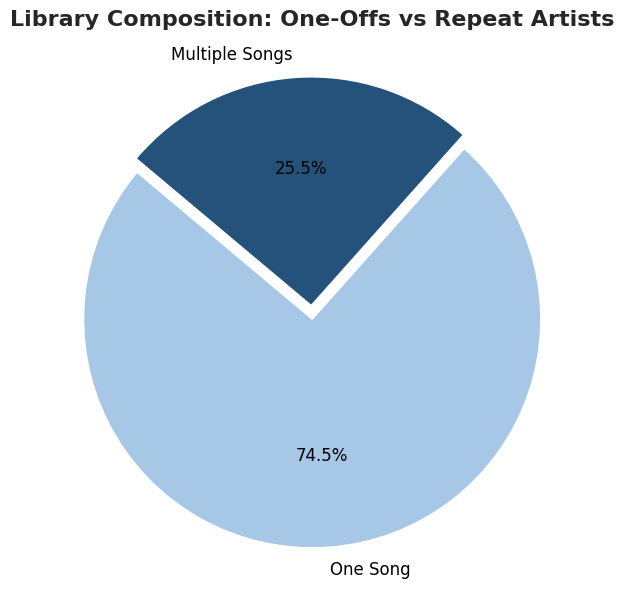

In [ ]:
import matplotlib.pyplot as plt

# Adjust explode values for cleaner spacing
explode = (0.03, 0.03)

# Create the pie chart
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12, 'color': 'black'},
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Add a spaced title
plt.subplots_adjust(top=0.85)  # Pushes chart down to create room for title
ax.set_title('Library Composition: One-Offs vs Repeat Artists', fontsize=16, weight='bold', pad=20)

# Ensure it is circular
ax.axis('equal')

plt.show()